# Laboratorio #3
##Jhoan Londoño Restrepo
### Curso de aprendizaje estadístico

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%pylab inline
from numpy.linalg import *
import sympy as sp
import pandas as pd

from mpl_toolkits import mplot3d
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


#Función de coste

1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:
 
Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [41]:
df = pd.DataFrame({'Y':list(range(6)), 'X_1':list(range(6))})
df

,Y,X_1
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


In [42]:
x1 = df["X_1"]
y = df["Y"]

2. Crear una función para calcular la función de coste.

Usaremos como función de coste el error cuadrático medio, este está definido de la siguient manera:

$$ECM = \frac{1}{m} \sum_{i=1}^m [y^{(i)} - f(x_0^{(i)}, x_1^{(i)}, x_2^{(i)}, \cdots, x_n^{(i)})]
$$ 

$$ ECM = \frac{1}{m} (\boldsymbol y - \boldsymbol X \boldsymbol \theta)^T (\boldsymbol y - \boldsymbol X \boldsymbol \theta)$$

In [43]:
def fcoste2(x1,y):
  m=6 #numero de datos que tenemos
  thetas =  np.array([sp.Symbol(r"theta_0"),
                      sp.Symbol(r"theta_1")])

  xs = np.c_[np.ones((m,1)),x1]

  B = (1/m)*(y - (xs.dot(thetas))).T.dot(y - (xs.dot(thetas))) #Ecuación matricial del error cuadrático medio/ función de coste

  return B

La forma analítica de la función de coste tiene la siguiente forma:

In [44]:
fcoste2(x1,y)

3. Asumiendo $\theta_0=0$, encuentre una representacion de gráfica de la función de coste para difeterentes valores de  $\theta_1$, ¿Cuál es el mínimo de la función de coste?, con este valor, grafique sobre los datos del dataframe construido la ecuación y regresión encontrada.


Asumiento $\theta = 0$ la función de coste, en este caso sería 1 dimensional, observemos

In [45]:
def fcoste3(x1,y):
  m=6 #numero de datos que tenemos
  thetas =  np.array([0,
                      sp.Symbol(r"theta_1")])

  xs = np.c_[np.ones((m,1)),x1]

  B = (1/m)*(y - (xs.dot(thetas))).T.dot(y - (xs.dot(thetas))) #Ecuación matricial del error cuadrático medio/ función de coste

  return B

In [47]:
fcoste3(x1,y)

Para la representación gráfica pasaremos nuestra función de simbólica a numérica, esta función recibirá los valores del vector $\theta$

In [13]:
import sympy
from sympy import *

A = sympy.Symbol(r"theta_0")
B = sympy.Symbol(r"theta_1")

H = lambdify([A,B], fcoste2(x1,y), "numpy")
H(5,8)

649.1666666666671

Text(0, 0.5, 'ECM(θ₁)')

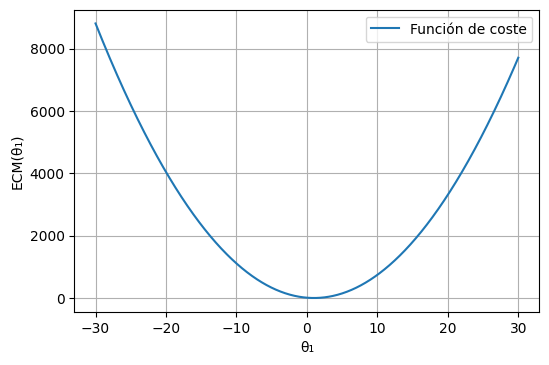

In [25]:
xs = np.linspace(-30,30,1000)
plt.figure(dpi=100)
plt.plot(xs,H(0,xs),label="Función de coste")
plt.grid()
plt.legend()
plt.xlabel("θ₁")
plt.ylabel("ECM(θ₁)")

Calculamos el mínimo de la función

In [32]:
from sympy import *
from sympy.plotting import plot
from sympy.abc import x
init_printing()

df = diff(H(0,x), x) # 1era. derivada

pc = solve(Eq(df, 0))
print("La función de coste se hace mínima en θ₁ = ",(int(pc[0])))

La función de coste se hace mínima en θ₁ =  1


4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera: 

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplar los metodos surface y contour dentro de la libreria de matplotlib.  Construya primero con los valores de $\theta_0$, $\theta_1 $ definidos un (np.mesgrid) y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código


En este caso la función de coste sigue siendo la misma, pero ya aqui $\theta_0$ no es despresiable

In [33]:
fcoste2(x1,y)

Grafiquemosla

Text(0.5, 0, 'ECM(θ₀,θ₁)')

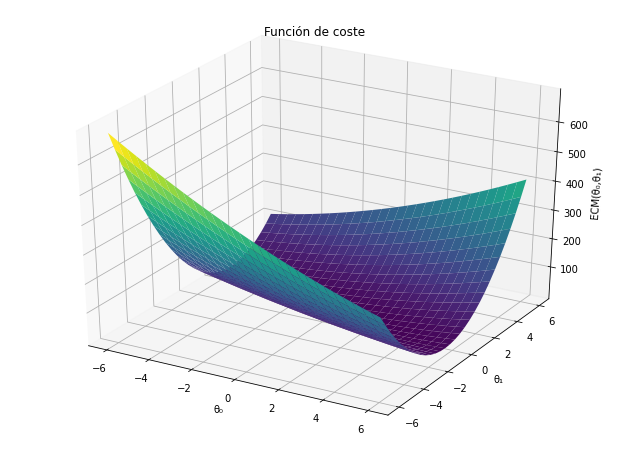

In [53]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = H(X, Y)

fig1=plt.figure(figsize=(11,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Función de coste');
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('ECM(θ₀,θ₁)')

# Gradiente Descendente


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual 
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el minimo de la función 







##Función de coste 1-Dimensional

Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el minimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

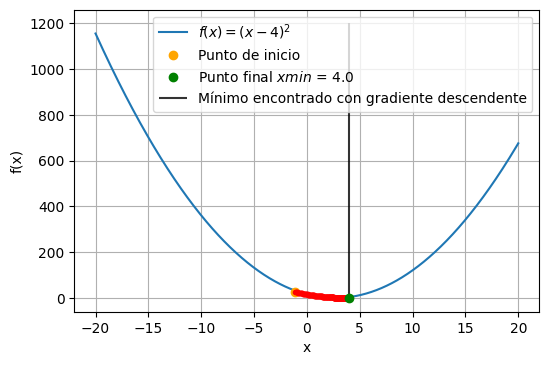

In [107]:
def f1(x):
  return (x-4)**2

h = 0.0001 #para el calculo de derivada numérica
lr = 0.0001#learning rate

Theta = np.random.rand(1)*4-2 #Tomamos un theta inicial aleatorio

Gradiente = np.zeros(1) #creamos 

xs1 = np.linspace(-20,20,1000)
plt.figure(dpi=100)
plt.plot(xs1,f1(xs),label=r"$f(x)= (x-4)^2$")
#plt.vlines(Theta[0], 0, 1200, alpha=0.8,label="Mínimo encontrado con gradiente descendente")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(Theta[0],f1(Theta[0]),"o",c="orange",label="Punto de inicio")

for j in range(50000):
  for i in range(1):
    T = np.copy(Theta)
    T[i] = T[i] + h #incrementamos un h en la componente en x, y, z del vector theta
    derivada = (f1(T[0]) - f1(Theta[0]))/h #Calculo de la derivada en su respectiva componente
    Gradiente[i] = derivada
    
  Theta = Theta - lr *Gradiente  #Aplicamos gradiente descendente

  if (j%50 ==0):
    plt.plot(Theta[0],f1(Theta[0]),".",c="red")
    #print(f" fcoste = {f1(Theta[0])} \t x =  {Theta[0]} ") #imprimimos el valor de la función de coste y los thetas para una iteración i-ésima

plt.plot(Theta[0],f1(Theta[0]),"o",c="green",label=f"Punto final $xmin$ = {np.round(Theta[0],3)}")
plt.vlines(Theta[0], 0, 1200, alpha=0.8,label="Mínimo encontrado con gradiente descendente")
plt.legend()
plt.show()

##Función de coste 2-Dimensional


Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente 


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
  - Determine el valor mínimo de la funcion con el metodo del gradiente descendente.



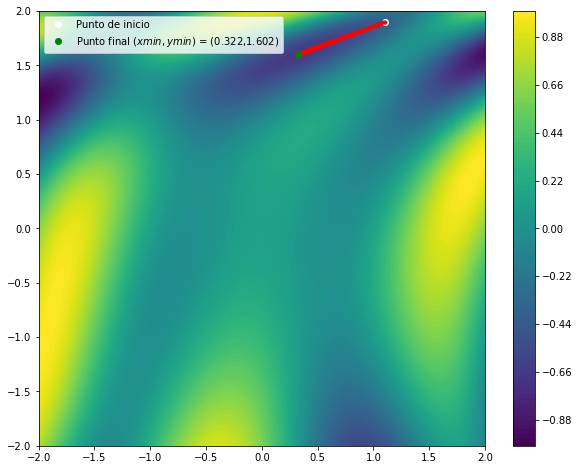

In [109]:
def f2(x,y):
  return np.sin(0.5*x**2 - 0.25*y**2 + 3)*np.cos(2*x + 1 - np.exp(y))
  
h = 0.0001 #para el calculo de derivada numérica
lr = 0.0004#learning rate

res = 100
_X = np.linspace(-2,2,res)
_Y = np.linspace(-2,2,res)
_Z = np.zeros((res,res))

for ix,x in enumerate(_X):
  for iy, y in enumerate(_Y):
    _Z[iy,ix] = f2(x,y)

plt.figure(figsize=(10,8))
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()

Theta = np.random.rand(2)*4-2 #Tomamos un theta inicial aleatorio

Gradiente = np.zeros(2) #creamos 

plt.plot(Theta[0],Theta[1],"o",c="white",label="Punto de inicio")

for j in range(50000):
  for i in range(2):
    T = np.copy(Theta)
    T[i] = T[i] + h #incrementamos un h en la componente en x, y, z del vector theta
    derivada = (f2(T[0],T[1]) - f2(Theta[0],Theta[1]))/h #Calculo de la derivada en su respectiva componente
    Gradiente[i] = derivada
    
  Theta = Theta - lr *Gradiente  #Aplicamos gradiente descendente
  if (j%50 ==0):
    plt.plot(Theta[0],Theta[1],".",c="red")
    #print(f" fcoste = {f2(Theta[0],Theta[1])} \t θ₀ =  {Theta[0]} \t θ₁ = {Theta[1]} ") #imprimimos el valor de la función de coste y los thetas para una iteración i-ésima

plt.plot(Theta[0],Theta[1],"o",c="green",label=f"Punto final $(xmin,ymin)$ = ({np.round(Theta[0],3)},{np.round(Theta[1],3)})")
plt.legend()
plt.show()

Como se puede observar el algoritmo esta encontrando el mínimo de la función eficientemente

#Regresión lineal

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

Con las herramientas desarrolladas en los apartados anteriores, 
construya un algorítmo que permita determinar una regresión lineal.



##Función de coste

Para nuestra propia regresión lineal comenzaremos asumiendo una función de coste igual al error cuadrático medio, esta como la vimos al principio, esta esta descrita por la siguient eecuación:

$$ECM = \frac{1}{m} \sum_{i=1}^m [y^{(i)} - f(x_0^{(i)}, x_1^{(i)}, x_2^{(i)}, \cdots, x_n^{(i)})]
$$ 

$$ ECM = \frac{1}{m} (\boldsymbol y - \boldsymbol X \boldsymbol \theta)^T (\boldsymbol y - \boldsymbol X \boldsymbol \theta)$$



In [182]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

In [183]:
def fcoste2(m,x1,y):
  #m=100 #numero de datos que tenemos
  x1 = x1[:m]
  y = y[:m]
  thetas =  np.array([sp.Symbol(r"theta_0"),
                      sp.Symbol(r"theta_1")])

  xs = np.c_[np.ones((m,1)),x1]

  B = (1/m)*(y - (xs.dot(thetas))).T.dot(y - (xs.dot(thetas))) #Ecuación matricial del error cuadrático medio/ función de coste

  return B

Nuestra función de coste de manera analítica se hace muy complicada cuando tomamos todos los datos, por tanto, si elegimos 5 puntos al azar de nuestros set de datos, obtendríamos esto

In [184]:
fcoste2(5,X,y)

Pasamos de simbólica a numérica nuestra función de coste, pero esta vez claramente usaremos todos los datos que nos proporciona la data

In [185]:
A = sympy.Symbol(r"theta_0")
B = sympy.Symbol(r"theta_1")

H = lambdify([A,B], fcoste2(100,X,y), "numpy")
H(5,8)

##Gradiente descendente

Para hallar la mejor linea recta que modela los datos, se hace uso del gradiente descendiente para hallar los valores de $\theta_0$ y $\theta_1$ que hacen mínimo la función de coste $J$.

In [186]:
h = 0.0001 #para el calculo de derivada numérica
lr = 0.001#learning rate

Theta = np.random.rand(2)*10 #Tomamos un theta inicial aleatorio

Gradiente = np.zeros(2) #creamos 

for j in range(50000):
  for i in range(2):
    T = np.copy(Theta)
    T[i] = T[i] + h #incrementamos un h en la componente en x, y, z del vector theta
    derivada = (H(T[0],T[1]) - H(Theta[0],Theta[1]))/h #Calculo de la derivada en su respectiva componente
    Gradiente[i] = derivada
    
  Theta = Theta - lr *Gradiente  #Aplicamos gradiente descendente

  if (j%500 ==0):
    print(f" fcoste = {H(Theta[0],Theta[1])} \t θ₀ =  {Theta[0]} \t θ₁ = {Theta[1]} ") #imprimimos el valor de la función de coste y los thetas para una iteración i-ésima

 fcoste = 64.91629987224827 	 θ₀ =  3.8636700115332987 	 θ₁ = 8.299213444268497 
 fcoste = 6.689126880038184 	 θ₀ =  -0.4359239333080547 	 θ₁ = 5.596336860678036 
 fcoste = 1.8967493565151226 	 θ₀ =  -1.535334546793056 	 θ₁ = 4.634398001024438 
 fcoste = 1.3467202987404383 	 θ₀ =  -1.7426935827983994 	 θ₁ = 4.174713523130194 
 fcoste = 1.153090426732104 	 θ₀ =  -1.7060146568414072 	 θ₁ = 3.8684229657188838 
 fcoste = 1.0064395854934443 	 θ₀ =  -1.6069303524543535 	 θ₁ = 3.616717109694446 
 fcoste = 0.8799824667822282 	 θ₀ =  -1.4960710686257352 	 θ₁ = 3.3910903765243114 
 fcoste = 0.7695368369065335 	 θ₀ =  -1.3872880030266446 	 θ₁ = 3.1828373387289295 
 fcoste = 0.6729634089278601 	 θ₀ =  -1.2841234453914987 	 θ₁ = 2.9888606165501415 
 fcoste = 0.5885110069434681 	 θ₀ =  -1.1872460429982825 	 θ₁ = 2.807680671810255 
 fcoste = 0.5146576198236361 	 θ₀ =  -1.0965382716975183 	 θ₁ = 2.6383120176694397 
 fcoste = 0.45007297980431393 	 θ₀ =  -1.0116815378833919 	 θ₁ = 2.4799449264688582 
 f

##Resultados

Text(0, 0.5, 'Y')

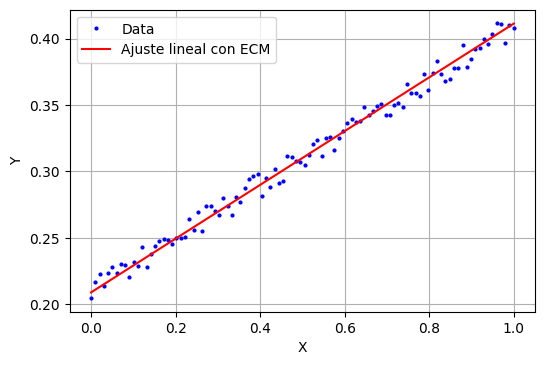

In [188]:
xs = np.linspace(0,1,1000)
plt.figure(dpi=100)
plt.plot(X,y,"bo",ms=2,label="Data")
plt.plot(xs,Theta[0] + xs*Theta[1] ,color="red",label="Ajuste lineal con ECM")
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

##Aplicando la ecuación normal:

$$ \theta = (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T y
$$

Obtenemos el vector $\theta$ igual a:

In [189]:
Xarray = np.c_[np.ones((len(X),1)),X]

B = np.linalg.inv(Xarray.T.dot(Xarray)).dot(Xarray.T).dot(y)
print(f"θ₀ = {B[0]} \t θ₁ = {B[1]}")

θ₀ = 0.2121491453475381 	 θ₁ = 0.19647250776573222


Text(0, 0.5, 'Y')

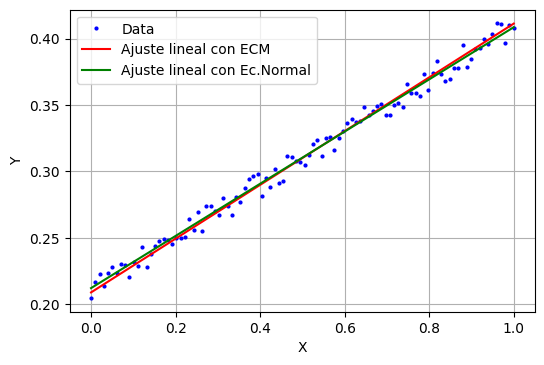

In [190]:
xs = np.linspace(0,1,1000)
plt.figure(dpi=100)
plt.plot(X,y,"bo",ms=2,label="Data")
plt.plot(xs,Theta[0] + xs*Theta[1] ,color="red",label="Ajuste lineal con ECM")
plt.plot(xs,B[0] + xs*B[1] ,color="green",label="Ajuste lineal con Ec.Normal")
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

##LinearRegression de sklearn

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [195]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
df_f = pd.DataFrame({'X': X, 'y': y})

X = df_f[['X']]
y = df_f["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(),LinearRegression())

model.fit(X_train,y_train)
print("El score de la regresión lineal es:",model.score(X_test,y_test))

El score de la regresión lineal es: 0.9885000534850499


Text(0, 0.5, 'Y')

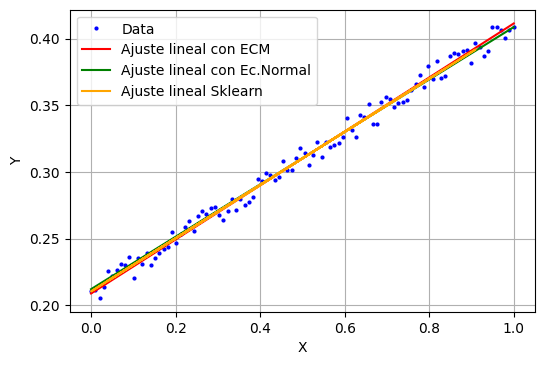

In [194]:
y_predict = model.predict(X_test)
xs = np.linspace(0,1,1000)
plt.figure(dpi=100)
plt.plot(X,y,"bo",ms=2,label="Data")
plt.plot(xs,Theta[0] + xs*Theta[1] ,color="red",label="Ajuste lineal con ECM")
plt.plot(xs,B[0] + xs*B[1] ,color="green",label="Ajuste lineal con Ec.Normal")
plt.plot(X_test,y_predict,color="orange",label="Ajuste lineal Sklearn")
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

Como se puede observar en todos los modelos obtenemos resultados bastante buenos, con una varianza entre ellos casi insignificante